In [3]:
# Task 1: Working with Series
# 1.Create a Pandas Series from the following list: data = [25, 30, 35, 40, 45]
# 2. Write a Python program to:
# o Assign custom indices ['A', 'B', 'C', 'D', 'E'] to the Series.
# o Display the first three elements of the Series.
# o Calculate the mean, median, and standard deviation of the Series.

import pandas as pd
data = [25, 30, 35, 40, 45]
s = pd.Series(data)
s.index = ['A', 'B', 'C', 'D', 'E']

# Display
print("First three elements of the Series:")
print(s[:3])

mean = s.mean()
median = s.median()
std = s.std()

# Display
print()
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std}")


First three elements of the Series:
A    25
B    30
C    35
dtype: int64

Mean: 35.0
Median: 35.0
Standard Deviation: 7.905694150420948


In [6]:
# Task 2: Creating and Inspecting DataFrames
# 1.Create a Pandas DataFrame with the following data:
# Name Age Gender Marks 
# Alice 20 Female 85
# Bob 22 Male 78
# Carol 19 Female 92
# David 21 Male 74
# Eve 20 Female 88
# 2. Write a Python program to:
# o Display the first two rows of the DataFrame.
# o Display the column names, data types, and summary statistics.
# o Add a new column Passed that contains True if Marks >= 80 and False otherwise.

data = {
    'Name': ['Alice', 'Bob', 'Carol', 'David', 'Eve'],
    'Age': [20, 22, 19, 21, 20],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
    'Marks': [85, 78, 92, 74, 88]
}

df = pd.DataFrame(data)
print("First two rows of the DataFrame:")
print(df.head(2))

print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe(include='all'))

df['Passed'] = df['Marks'] >= 80

print("\n New Column 'Passed' added:")
print(df)

First two rows of the DataFrame:
    Name  Age  Gender  Marks
0  Alice   20  Female     85
1    Bob   22    Male     78

Column Names:
['Name', 'Age', 'Gender', 'Marks']

Data Types:
Name      object
Age        int64
Gender    object
Marks      int64
dtype: object

Summary Statistics:
         Name        Age  Gender      Marks
count       5   5.000000       5   5.000000
unique      5        NaN       2        NaN
top     Alice        NaN  Female        NaN
freq        1        NaN       3        NaN
mean      NaN  20.400000     NaN  83.400000
std       NaN   1.140175     NaN   7.334848
min       NaN  19.000000     NaN  74.000000
25%       NaN  20.000000     NaN  78.000000
50%       NaN  20.000000     NaN  85.000000
75%       NaN  21.000000     NaN  88.000000
max       NaN  22.000000     NaN  92.000000

 New Column 'Passed' added:
    Name  Age  Gender  Marks  Passed
0  Alice   20  Female     85    True
1    Bob   22    Male     78   False
2  Carol   19  Female     92    True
3  David 

In [7]:
# Task 3: Data Selection and Filtering
# 1. Using the DataFrame from Task 2, write a Python program to:
# o Select and display the Name and Marks columns.
# o Filter and display records where Marks > 80.
# o Display the record of the student with the highest marks.

print("Name and Marks columns:")
print(df[['Name', 'Marks']])

print("\nStudents with Marks > 80:")
print(df[df['Marks'] > 80])

max_marks = df['Marks'].max()
student = df[df['Marks'] == max_marks]

print("\nStudent with the highest marks:")
print(student)

Name and Marks columns:
    Name  Marks
0  Alice     85
1    Bob     78
2  Carol     92
3  David     74
4    Eve     88

Students with Marks > 80:
    Name  Age  Gender  Marks  Passed
0  Alice   20  Female     85    True
2  Carol   19  Female     92    True
4    Eve   20  Female     88    True

Student with the highest marks:
    Name  Age  Gender  Marks  Passed
2  Carol   19  Female     92    True


In [9]:
# Task 4: Handling Missing Data
# 1. Modify the DataFrame from Task 2 by introducing missing values:
# 2. df.loc[1, 'Marks'] = None
# 3. df.loc[4, 'Age'] = None
# 4. Write a Python program to:
# o Identify missing values in the DataFrame.
# o Fill missing values in the Marks column with the column's mean.
# o Drop rows where the Age column has missing values.

df.loc[1, 'Marks'] = None  
df.loc[4, 'Age'] = None     

print("Missing values in the DataFrame:")
print(df.isnull())

mean = df['Marks'].mean()
df['Marks'] = df['Marks'].fillna(mean)
print("\nDataFrame after filling missing Marks with mean:")
print(df)

df_drop = df.dropna(subset=['Age'])
print("\nDataFrame after dropping rows with missing Age:")
print(df_drop)


Missing values in the DataFrame:
    Name    Age  Gender  Marks  Passed
0  False  False   False  False   False
1  False  False   False   True   False
2  False  False   False  False   False
3  False  False   False  False   False
4  False   True   False  False   False

DataFrame after filling missing Marks with mean:
    Name   Age  Gender  Marks  Passed
0  Alice  20.0  Female  85.00    True
1    Bob  22.0    Male  84.75   False
2  Carol  19.0  Female  92.00    True
3  David  21.0    Male  74.00   False
4    Eve   NaN  Female  88.00    True

DataFrame after dropping rows with missing Age:
    Name   Age  Gender  Marks  Passed
0  Alice  20.0  Female  85.00    True
1    Bob  22.0    Male  84.75   False
2  Carol  19.0  Female  92.00    True
3  David  21.0    Male  74.00   False


In [11]:
# Task 5: Grouping and Aggregation
# 1. Using the DataFrame from Task 2, write a Python program to:
# o Group the data by Gender and calculate the mean age and marks for each gender.
# o Count the number of students in each gender group.

mean = df.groupby('Gender')[['Age', 'Marks']].mean()
print("Mean Age and Marks by Gender:")
print(mean)

count = df['Gender'].value_counts()
print("\nNumber of students in each gender group:")
print(count)

Mean Age and Marks by Gender:
         Age      Marks
Gender                 
Female  19.5  88.333333
Male    21.5  79.375000

Number of students in each gender group:
Gender
Female    3
Male      2
Name: count, dtype: int64


In [12]:
# Task 6: Reading and Writing Data
# 1. Write a Python program to:
# o Save the modified DataFrame from Task 4 to a CSV file named students_data.csv.
# o Read the CSV file into a new DataFrame.
# o Display the first five rows of the newly loaded DataFrame.

df_drop = df.dropna(subset=['Age'])
df_drop.to_csv('students_data.csv', index=False)

new_df = pd.read_csv('students_data.csv')

print("First five rows of the newly loaded DataFrame:")
print(new_df.head())

First five rows of the newly loaded DataFrame:
    Name   Age  Gender  Marks  Passed
0  Alice  20.0  Female  85.00    True
1    Bob  22.0    Male  84.75   False
2  Carol  19.0  Female  92.00    True
3  David  21.0    Male  74.00   False



Summary statistics:
       top_speed_kmh  battery_capacity_kWh  number_of_cells    torque_nm  \
count     478.000000            478.000000       276.000000   471.000000   
mean      185.487448             74.043724       485.293478   498.012739   
std        34.252773             20.331058      1210.819733   241.461128   
min       125.000000             21.300000        72.000000   113.000000   
25%       160.000000             60.000000       150.000000   305.000000   
50%       180.000000             76.150000       216.000000   430.000000   
75%       201.000000             90.600000       324.000000   679.000000   
max       325.000000            118.000000      7920.000000  1350.000000   

       efficiency_wh_per_km    range_km  acceleration_0_100_s  \
count            478.000000  478.000000            478.000000   
mean             162.903766  393.179916              6.882636   
std               34.317532  103.287335              2.730696   
min              109.000000  135.0

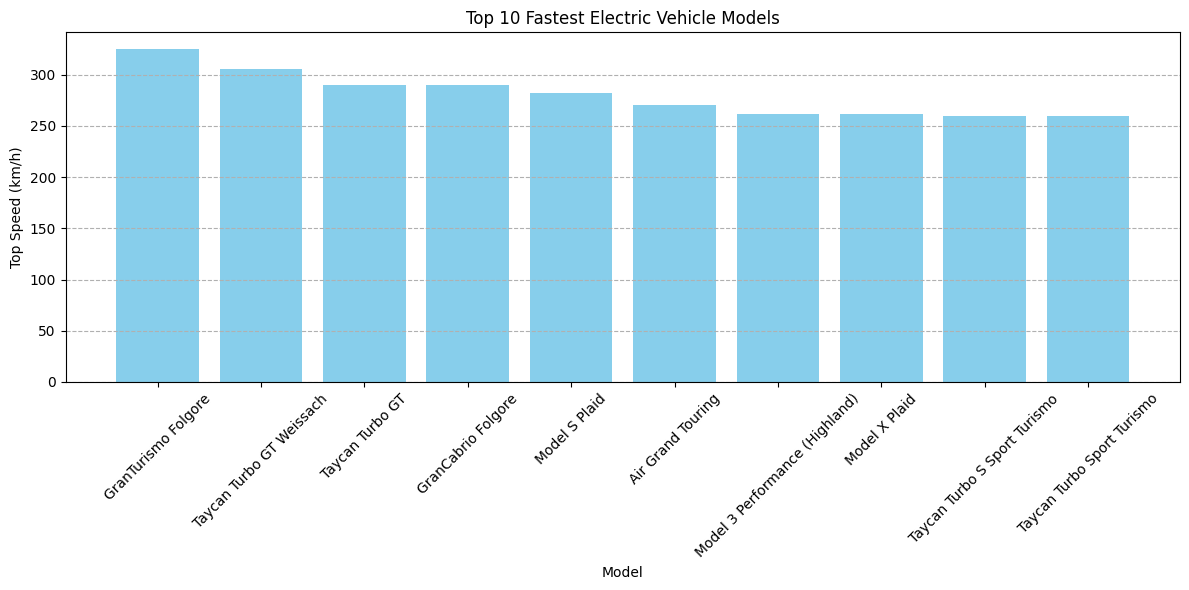

In [37]:
# Task 7: General
# 1. Download a sample dataset from Kaggle or use any public dataset.
# 2. Write a Python program to:
# o Load the dataset using Pandas.
# o Perform exploratory data analysis (EDA) by summarizing key statistics, checking for missing values, and visualizing data trends using Matplotlib or Seaborn.
# o Document your findings in Markdown or comments.

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("electric_vehicles_spec_2025.csv")

print("\nSummary statistics:")
print(df.describe())

print("\nMissing values in each column:")
print(df.isnull().sum())

df_speed = df[['model', 'top_speed_kmh']].dropna()
# Sort by top speed and get the top 10 models
top_models = df_speed.sort_values(by='top_speed_kmh', ascending=False).drop_duplicates('model').head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_models['model'], top_models['top_speed_kmh'], color='skyblue')
plt.title("Top 10 Fastest Electric Vehicle Models")
plt.xlabel("Model")
plt.ylabel("Top Speed (km/h)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Findings
# - GranTurismo Folgore leads with a top speed of over 320 km/h.
# - Tesla holds 3 strong positions: Model S Plaid, Model X Plaid, and Model 3 Performance.
# - All vehicles in the top 10 are luxury or performance-focused, indicating a clear trend in high-speed EV development.